# Python Tutorial III: Modules and Classes

In today's tutorial we'll learn how to build our own python modules and classes.  We'll start with modules:

## Modules

### When to use:
* Your script gets very long and you want to have easier maintenance. 
* You want to reuse a function in several programs or scripts without copy/paste.
* Performance reasons.

### What is it?
* A file containing Python definitions and statements.
* The file name is the module name with the suffix .py appended.
* Within a module, the module's name is available as the valuable of the global variable *__name__*.

Let's look at an example:

In [1]:
# module difference.py
def for_diff(function,x=0,h=.1):
    deriv=(function(x+h)-function(x))/h
    return deriv

def back_diff(function,x=0,h=.1):
    deriv=(function(x)-function(x-h))/h
    return deriv

def cent_diff(function,x=0,h=.1):
    deriv=(function(x+h)-function(x-h))/(2*h)
    return derive

We **import** modules just like we import libraries like ``numpy``, ``math``, and ``scipy``

<function matplotlib.pyplot.show>

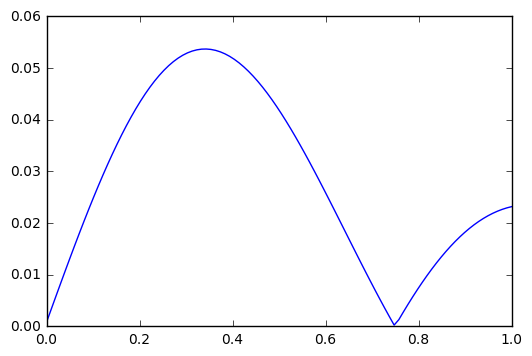

In [3]:
%matplotlib inline   
import differences as diff
import matplotlib.pyplot as plt
import numpy as np

def myfun(x=0):
    import numpy as np
    return np.exp(-x**2)*np.sin(np.pi*x)

def myder(x=0):
    from math import sin,exp,pi
    temp=np.exp(-x**2)
    return temp*(pi*np.cos(np.pi*x)-2*x*np.sin(np.pi*x))
    
X=np.linspace(0,1,100)
dX=diff.for_diff(myfun,X,.01)
abs_err=np.abs(dX-myder(X))

plt.plot(X,abs_err)
plt.show

## Where does the module file need to go?

Say you are trying to **import spam**.

When imported, the interpreter searches for spam in(in order):
1. A built-in module with that name. 
2. *spam.py* in a list of directories given by the variable *sys.path*. 
    1. The directory containing the input script (or the current directory when no file is specified).
    2. PYTHONPATH (a list of directory names, syntax as shell variable PATH).
    3. The installation-dependent default.

## Generalizations of Modules: Packages

Packages are modules with a directory structure.
You can even make packages with subpackages and simply exploit the dot.dot reference to navigate through the package to get to the function you want (e.g. matplotlib.pyplot.plot).  
If you want to develop a well-comparmentalized package you can look at online help: https://python-packaging.readthedocs.io/en/latest/


 

## Classes

Classes are a basic feature of object-oriented programming.  They are a little more complex than the *struct* features in Matlab.

In [5]:
class myClass:
    #Class attributes are variables that are shared by all objects of this class
    teacher='Varis Carey'
    off_hours='MW 1-2 TR 12:30-1:30'
    #instance variables are variables particular to an instance of the class and are
    #set in the CONSTRUCTOR
    def __init__(self,name,room):
        self.name=name
        self.room=room
        self.students=[] #empty student list
    
    #We can have other function within myclass-here is a METHOD to add_students
    def add_student(self,name):
        self.students.append(name)

c=myClass('M5660','AB4017')
d=myClass('M4650','AB4125')
print c.name
c.add_student('Michael')
c.add_student('Megan')
print c.students
print d.students

    

M5660
['Michael', 'Megan']
[]


Let's look at an example where we encounter another example of classical object oriented programming, **Inheritance**.

There's a file in the Tutuorial II directory that has the *solvers* module which contains classes used in this example.

In [6]:
class Solver:
    
    def __init__(self,function,start=0,tolerance=1E-8,maxiter=20):
        self.fn=function
        self.guess=start
        self.tolerance=tolerance
        self.maxiter=20
        self.iteration=0  #iteration counter
        self.root=None
    
    def state(self):
        print 'Iterate=',self.guess
        print 'Residual=',abs(self.fn(self.guess))
        print 'Iteration=',self.iteration
        if self.root!=None:
            print 'Root=',self.root

class BracketSolver(Solver):
    def __init__(self,function,guess=0,tolerance=1E-8,maxiter=20,left=-1,right=1):
            Solver.__init__(self,function,guess,tolerance,maxiter)
            self.left=left
            self.right=right
            self.lval=self.fn(left)
            self.rval=self.fn(right)
            if self.lval*self.rval > 0:
                print 'Warning: No Root guarantee',self.fn(left),self.fn(right)
            if self.left >= self.right:
                print 'Warning, Invalid Interval'
            
    def solve(self,type='bisection'):
            self.iteration+=1
            while self.iteration < self.maxiter:
                if type=='bisection':
                    self.guess=.5*(self.left+self.right) #bisect bracket
                    test=self.fn(self.guess)
                    if abs(test)<self.tolerance:  #we found a root
                        self.root=self.guess
                        return 
                    else:   #iterate
                        if self.lval*test < 0:
                            self.rval=test
                            self.right=self.guess
                            self.iteration+=1
                        else:
                            self.lval=test
                            self.left=self.guess
                            self.iteration+=1

def myfun(x):
    from math import cos
    return cos(x)-x

g=BracketSolver(myfun)
g.state()
g.solve()
g.state()
h=BracketSolver(myfun,left=g.left,right=g.right)
h.state()
h.solve()
h.state()


                            

Iterate= 0
Residual= 1.0
Iteration= 0
Iterate= 0.739086151123
Residual= 1.7035832659e-06
Iteration= 20
Iterate= 0
Residual= 1.0
Iteration= 0
Iterate= 0.739085137844
Residual= 7.7470245774e-09
Iteration= 6
Root= 0.739085137844


The inherited class (or subclass) can override methods(think functions) and attributes in the base class.  

In [ ]:
class Parabolic_Solver:
    
    def __init__(self,rhs,timestep,delta_x=.1,delta_y=.1,time_0=0.0,initial,time_adaptive=False):
        self.rhs=rhs
        self.initial=initial
        self.state=Parabolic_Solver.init_cond(self,initial)
        self.time_adaptive=time_adaptive
        gridx=np.linspace(0,1,np.int(1.0/delta_x+1))
        gridy=np.linspace(0,1,np.int(1.0/delta_y+1))
        self.grid=np.meshgrid(gridx,gridy)
        
    def init_cond(self):

        
class Implicit_Time_Solver(Parabolic_Solver):

    def __init__(self,method='BE'):
        


class Explicit_Time_Solver(Parabolic_Solver):
        
    def __init__(self,method='FE'):
        
    def advance(
    

In [8]:
class Solver:
    
    def __init__(self,function,start=0,tolerance=1E-8,maxiter=20):
        self.fn=function
        self.guess=start
        self.tolerance=tolerance
        self.maxiter=20
        self.iteration=0  #iteration counter
        self.root=None
    
    def state(self):
        print 'Iterate=',self.guess
        print 'Residual=',abs(self.fn(self.guess))
        print 'Iteration=',self.iteration
        if self.root!=None:
            print 'Root=',self.root

class BracketSolver(Solver):
    def __init__(self,function,guess=0,tolerance=1E-8,maxiter=20,left=-1,right=1):
            Solver.__init__(self,function,guess,tolerance,maxiter)
            self.left=left
            self.right=right
            self.lval=self.fn(left)
            self.rval=self.fn(right)
            if self.lval*self.rval > 0:
                print 'Warning: No Root guarantee',self.fn(left),self.fn(right)
            if self.left >= self.right:
                print 'Warning, Invalid Interval'
            
    def solve(self,type='bisection'):
            self.iteration+=1
            while self.iteration < self.maxiter:
                if type=='bisection':
                    self.guess=.5*(self.left+self.right) #bisect bracket
                    test=self.fn(self.guess)
                    if abs(test)<self.tolerance:  #we found a root
                        self.root=self.guess
                        return 
                    else:   #iterate
                        if self.lval*test < 0:
                            self.rval=test
                            self.right=self.guess
                            self.iteration+=1
                        else:
                            self.lval=test
                            self.left=self.guess
                            self.iteration+=1
    def state(self):
        print 'Interval=[',self.left,',',self.right,']'
        #now call Solver's state function but you must call it directly!
        Solver.state(self)
    

def myfun(x):
    from math import cos
    return cos(x)-x

g=BracketSolver(myfun)
g.state()
g.solve()
g.state()
h=BracketSolver(myfun,left=g.left,right=g.right)
h.state()
h.solve()
h.state()


                            

Interval=[ -1 , 1 ]
Iterate= 0
Residual= 1.0
Iteration= 0
Interval=[ 0.739082336426 , 0.739086151123 ]
Iterate= 0.739086151123
Residual= 1.7035832659e-06
Iteration= 20
Interval=[ 0.739082336426 , 0.739086151123 ]
Iterate= 0
Residual= 1.0
Iteration= 0
Interval=[ 0.739085078239 , 0.739085197449 ]
Iterate= 0.739085137844
Residual= 7.7470245774e-09
Iteration= 6
Root= 0.739085137844
